## Polynomial Regression

### Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


### Loading Dataset 

In [5]:
df=pd.read_csv('FuelConsumption.csv')

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### Train and Test Splitting 

In [8]:
#train and test split
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=cdf[~msk]


Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

𝑦=𝑏+𝜃1𝑥+𝜃2𝑥2 
Now, the question is: how we can fit our data on this equation while we have only x values, such as Engine Size? Well, we can create a few additional features: 1,  𝑥 , and  𝑥2 .

PloynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [9]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

poly=PolynomialFeatures(degree=3)
train_poly_x=poly.fit_transform(train_x)

regr=linear_model.LinearRegression()
train_y=regr.fit(train_poly_x,train_y)
print('Coefficient : ',regr.coef_)
print('Intercept : ',regr.intercept_)

Coefficient :  [[ 0.         24.05020757  5.5458471  -0.5662604 ]]
Intercept :  [136.01847918]


### Data Visualization

Text(0, 0.5, 'Emission')

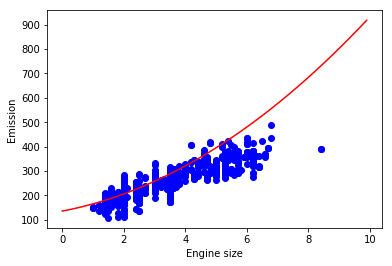

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")


### Calculating Score

In [17]:
from sklearn.metrics import r2_score

test_poly_x=poly.fit_transform(test_x)
test_hat_y=regr.predict(test_poly_x)

print('Mean absolute error : %.2f'% np.mean(np.absolute(test_hat_y-test_y)))
print('Residual Error : %.2f'% np.mean((test_hat_y-test_y)**2))
print('R2 - Score : %.2f'% r2_score(test_hat_y,test_y))

Mean absolute error : 22.42
Residual Error : 930.08
R2 - Score : 0.68
